In [ ]:
#try a naive Bayes model on the flu data--the more cleaned-up version
#with the categorical variables encoded

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.dummy import DummyClassifier

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
#load the data from the cleaned-up .csv files made for the tree models
#separate data into two data frames: features and target. take out the respondent ids from both
df_flu_train_features_DT = pd.read_csv('./df_flu_train_clean_noNaNs_featuresonly.csv')
df_flu_train_target_DT = pd.read_csv('./df_flu_target_clean_noNaNs_seasonal.csv')

In [4]:
df_flu_train_features_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 19642 non-null  int64 
 1   h1n1_knowledge               19642 non-null  int64 
 2   behavioral_antiviral_meds    19642 non-null  int64 
 3   behavioral_avoidance         19642 non-null  int64 
 4   behavioral_face_mask         19642 non-null  int64 
 5   behavioral_wash_hands        19642 non-null  int64 
 6   behavioral_large_gatherings  19642 non-null  int64 
 7   behavioral_outside_home      19642 non-null  int64 
 8   behavioral_touch_face        19642 non-null  int64 
 9   doctor_recc_h1n1             19642 non-null  int64 
 10  doctor_recc_seasonal         19642 non-null  int64 
 11  chronic_med_condition        19642 non-null  int64 
 12  child_under_6_months         19642 non-null  int64 
 13  health_worker                19

In [5]:
df_flu_train_target_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   seasonal_vaccine  19642 non-null  int64
dtypes: int64(1)
memory usage: 153.6 KB


In [6]:
df_flu_train_features_DT.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,1,1,0,1,0,1,1,0,0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
3,2,1,0,1,0,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0
4,3,1,0,1,0,1,0,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3
5,0,0,0,0,0,0,0,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0
6,1,0,0,1,0,1,0,0,1,1,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2,0
7,0,2,0,1,0,1,1,1,1,0,...,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1,0
8,2,1,0,1,0,0,1,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0,0
9,2,1,0,1,0,1,1,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2,0


In [7]:
df_flu_train_target_DT.head(10)

,seasonal_vaccine
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,1


In [8]:
#get dummy variables for the categorical features. First make a copy of the data frame
df_flu_train_features_DT_1=df_flu_train_features_DT.copy()
pd.get_dummies(df_flu_train_features_DT_1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3,2,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,3,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,3,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
19638,2,2,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19639,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
19640,1,2,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
#Train-validation split of the data
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(df_flu_train_features_DT_1), df_flu_train_target_DT, 
                                                    test_size = 0.2, random_state=42)

In [11]:
#Now run the Bernoulli Naive Bayes model. Score is the mean accuracy
nb = BernoulliNB()
nb.fit(X_train,np.ravel(y_train))
nb.score(X_val,np.ravel(y_val))

0.6994146093153474

In [13]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns

In [15]:
print("Naive Bayes Bernoulli Confusion Matrix: \n\n", confusion_matrix(y_val, nb.predict(X_val)))

Naive Bayes Bernoulli Confusion Matrix: 

 [[1470  564]
 [ 617 1278]]


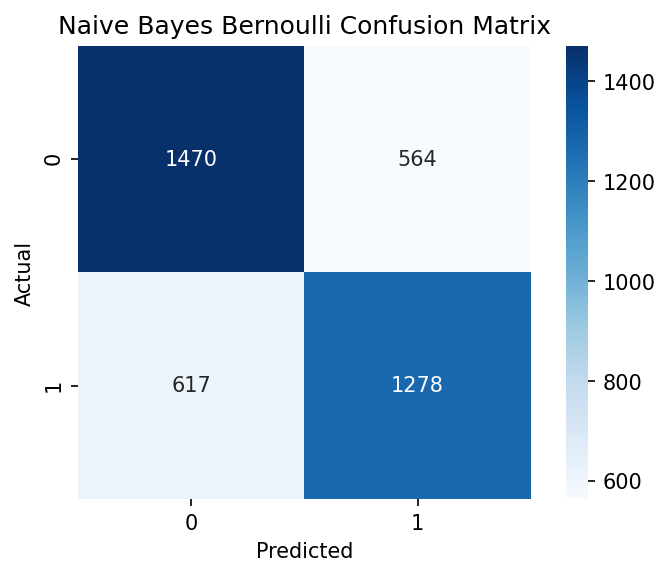

In [18]:
nb_confusion = confusion_matrix(y_true=y_val, y_pred=nb.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(nb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d"
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Bernoulli Confusion Matrix');